In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [185]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
ss = pd.read_csv("SampleSubmission.csv")

In [186]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

In [187]:
le = LabelEncoder()
lb = LabelBinarizer()

In [188]:
train.shape

(23524, 13)

In [189]:
test.shape

(10086, 12)

In [190]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [191]:
train.head(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [192]:
test["country"].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [193]:
# Converting country to integers using LabelEncoder
train["country"] = le.fit_transform(train["country"])
test["country"] = le.fit_transform(test["country"])

In [194]:
test["year"].unique()

array([2018, 2016, 2017], dtype=int64)

In [195]:
# Converting year to integers using LabelEncoder
#train["year"] = le.fit_transform(train["year"])
#test["year"] = le.fit_transform(test["year"])

In [196]:
train["location_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [197]:
train["location_type"] = train["location_type"].apply(lambda x: 1 if x == "Rural" else 0)
test["location_type"] = test["location_type"].apply(lambda x: 1 if x == "Rural" else 0)

In [198]:
train["bank_account"].unique()

array(['Yes', 'No'], dtype=object)

In [199]:
train["bank_account"] = train["bank_account"].apply(lambda x: 1 if x == "Yes" else 0)

In [200]:
train["gender_of_respondent"].unique()

array(['Female', 'Male'], dtype=object)

In [201]:
train["gender_of_respondent"] = train["gender_of_respondent"].apply(lambda x: 1 if x == "Male" else 0)
test["gender_of_respondent"] = test["gender_of_respondent"].apply(lambda x: 1 if x == "Male" else 0)

In [202]:
train["cellphone_access"].unique()

array(['Yes', 'No'], dtype=object)

In [203]:
train["cellphone_access"] = train["cellphone_access"].apply(lambda x: 1 if x == "Male" else 0)
test["cellphone_access"] = test["cellphone_access"].apply(lambda x: 1 if x == "Male" else 0)

In [204]:
train["relationship_with_head"].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [205]:
# Converting relationship_with_head to integers using LabelEncoder
train["relationship_with_head"] = le.fit_transform(train["relationship_with_head"])
test["relationship_with_head"] = le.fit_transform(test["relationship_with_head"])

In [206]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_1,1,1,0,3,24,0,5,Married/Living together,Secondary education,Self employed
1,0,2018,uniqueid_2,0,1,0,5,70,0,1,Widowed,No formal education,Government Dependent
2,0,2018,uniqueid_3,1,0,0,5,26,1,3,Single/Never Married,Vocational/Specialised training,Self employed
3,0,2018,uniqueid_4,0,1,0,5,34,0,1,Married/Living together,Primary education,Formally employed Private
4,0,2018,uniqueid_5,0,0,0,8,26,1,0,Single/Never Married,Primary education,Informally employed


In [207]:
train["marital_status"].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [208]:
# Converting relationship to integers using LabelEncoder
train["marital_status"] = le.fit_transform(train["marital_status"])
test["marital_status"] = le.fit_transform(test["marital_status"])

In [209]:
# Converting relationship to integers using LabelEncoder
train["relationship_with_head"] = le.fit_transform(train["relationship_with_head"])
test["relationship_with_head"] = le.fit_transform(test["relationship_with_head"])

In [210]:
train["education_level"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [211]:
# Converting education to integers using LabelEncoder
train["education_level"] = le.fit_transform(train["education_level"])
test["education_level"] = le.fit_transform(test["education_level"])

In [212]:
train["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [213]:
# Converting job to integers using LabelEncoder
train["job_type"] = le.fit_transform(train["job_type"])
test["job_type"] = le.fit_transform(test["job_type"])

In [214]:
#test.drop("uniqueid", axis = "columns", inplace = True)

In [215]:
train.drop("uniqueid", axis = "columns", inplace = True)

In [216]:
train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,1,0,3,24,0,5,2,3,9
1,0,2018,0,1,0,5,70,0,1,4,0,4
2,0,2018,1,0,0,5,26,1,3,3,5,9
3,0,2018,0,1,0,5,34,0,1,2,2,3
4,0,2018,0,0,0,8,26,1,0,3,2,5


In [217]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country                 23524 non-null  int32
 1   year                    23524 non-null  int64
 2   bank_account            23524 non-null  int64
 3   location_type           23524 non-null  int64
 4   cellphone_access        23524 non-null  int64
 5   household_size          23524 non-null  int64
 6   age_of_respondent       23524 non-null  int64
 7   gender_of_respondent    23524 non-null  int64
 8   relationship_with_head  23524 non-null  int64
 9   marital_status          23524 non-null  int32
 10  education_level         23524 non-null  int32
 11  job_type                23524 non-null  int32
dtypes: int32(4), int64(8)
memory usage: 1.8 MB


In [218]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  int32 
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  int64 
 4   cellphone_access        10086 non-null  int64 
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  int64 
 8   relationship_with_head  10086 non-null  int64 
 9   marital_status          10086 non-null  int32 
 10  education_level         10086 non-null  int32 
 11  job_type                10086 non-null  int32 
dtypes: int32(4), int64(7), object(1)
memory usage: 788.1+ KB


In [219]:
train.tail()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,3,2018,0,1,0,4,48,0,1,0,0,7
23520,3,2018,0,1,0,2,27,0,1,3,3,7
23521,3,2018,0,1,0,5,27,0,4,4,2,7
23522,3,2018,0,0,0,7,30,0,4,0,3,9
23523,3,2018,0,1,0,10,20,1,0,3,3,6


In [220]:
test.tail()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
10081,3,2018,uniqueid_2998,1,0,2,62,0,5,2,2,9
10082,3,2018,uniqueid_2999,0,0,8,42,1,1,2,2,9
10083,3,2018,uniqueid_3000,0,0,1,39,1,1,3,3,7
10084,3,2018,uniqueid_3001,1,0,6,28,0,5,2,2,9
10085,3,2018,uniqueid_3002,0,0,7,16,1,3,3,3,7


In [221]:
ss

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
...,...,...
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0


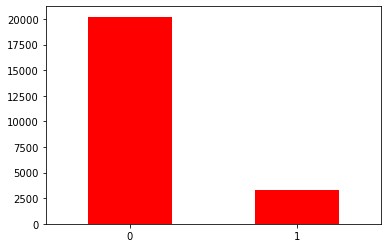

In [222]:
train["bank_account"].value_counts().plot(kind = "bar", color = "red")
plt.xticks(rotation = 0)

plt.show()

In [223]:
train.head(5)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,1,0,3,24,0,5,2,3,9
1,0,2018,0,1,0,5,70,0,1,4,0,4
2,0,2018,1,0,0,5,26,1,3,3,5,9
3,0,2018,0,1,0,5,34,0,1,2,2,3
4,0,2018,0,0,0,8,26,1,0,3,2,5


In [224]:
cols_to_encode = train[["country", "job_type", "relationship_with_head", "marital_status", "education_level", "job_type"]]

In [225]:
X = train.drop("bank_account", axis = "columns")

In [226]:
y = train["bank_account"]

In [625]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=12)

In [626]:
logist = LogisticRegression()

In [627]:
logist.fit(X_train, y_train)

C:\Users\mojja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [628]:
rain = logist.predict(X_test)

In [629]:
accuracy_score(y_test, rain) * 100

87.81524511192973

In [630]:
f1_score(y_test, rain)

0.3562874251497006

In [631]:
tree = RandomForestClassifier()

In [632]:
tree.fit(X_train, y_train)

RandomForestClassifier()

In [616]:
tree.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [617]:
rain2 = tree.predict(X_test)

In [618]:
accuracy_score(y_test, rain2) * 100

87.33352224426183

In [619]:
f1_score(y_test, rain2)

0.4697508896797153

In [620]:
gaus = GaussianNB()

In [621]:
gaus.fit(X_train, y_train)

GaussianNB()

In [622]:
gaus.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [623]:
rain3 = gaus.predict(X_test)

In [624]:
accuracy_score(y_test, rain3) * 100

87.58855199773306

In [247]:
f1_score(y_test, rain3)

0.4057377049180328

In [248]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_6056,0,0,3,30,1,1,2,3,2
1,0,2018,uniqueid_6060,0,0,7,51,1,1,2,5,3
2,0,2018,uniqueid_6065,1,0,3,77,0,4,2,0,8
3,0,2018,uniqueid_6072,1,0,6,39,0,1,2,2,8
4,0,2018,uniqueid_6073,0,0,3,16,1,0,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,3,2018,uniqueid_2998,1,0,2,62,0,5,2,2,9
10082,3,2018,uniqueid_2999,0,0,8,42,1,1,2,2,9
10083,3,2018,uniqueid_3000,0,0,1,39,1,1,3,3,7
10084,3,2018,uniqueid_3001,1,0,6,28,0,5,2,2,9


In [249]:
y_test

1816     0
18897    0
2062     0
21810    0
2213     1
        ..
3922     0
7934     0
5828     0
22468    0
22228    1
Name: bank_account, Length: 7058, dtype: int64

In [250]:
tree.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [251]:
random_forest_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [252]:
test.shape

(10086, 12)

In [253]:
ss.shape

(33610, 2)

In [254]:
test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,uniqueid_6056,0,0,3,30,1,1,2,3,2
1,0,2018,uniqueid_6060,0,0,7,51,1,1,2,5,3
2,0,2018,uniqueid_6065,1,0,3,77,0,4,2,0,8
3,0,2018,uniqueid_6072,1,0,6,39,0,1,2,2,8
4,0,2018,uniqueid_6073,0,0,3,16,1,0,3,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,3,2018,uniqueid_2998,1,0,2,62,0,5,2,2,9
10082,3,2018,uniqueid_2999,0,0,8,42,1,1,2,2,9
10083,3,2018,uniqueid_3000,0,0,1,39,1,1,3,3,7
10084,3,2018,uniqueid_3001,1,0,6,28,0,5,2,2,9


In [255]:
test.drop("uniqueid", axis = "columns", inplace = True)

In [256]:
random_forest_pred = tree.predict(test)

In [257]:
random_forest_pred.shape

(10086,)

In [258]:
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [259]:
pd.DataFrame(data = random_forest_pred, columns = ["bank_account"])

,bank_account
0,1
1,1
2,0
3,0
4,0
...,...
10081,0
10082,0
10083,0
10084,0


In [260]:
Test = pd.read_csv("Test.csv")

In [261]:
# creating a dataframe for unique
a = pd.DataFrame({"uniqueid":Test["uniqueid"] + " x " + Test["country"], "bank_account":random_forest_pred})

In [262]:
a

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0


In [263]:
a.to_csv("prediction2.csv", index = False)

In [264]:
gaus.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [265]:
gausPred = gaus.predict(test)

In [266]:
g = pd.DataFrame({"uniqueid":Test["uniqueid"] + " x " + Test["country"], "bank_account":gausPred})

In [267]:
g.to_csv("gausPred2.csv", index = False)

In [568]:
logPred = logist.predict(test)

In [569]:
h = pd.DataFrame({"uniqueid":Test["uniqueid"] + " x " + Test["country"], "bank_account":logPred})

In [571]:
h.to_csv("logPred.csv", index = False)